<a href="https://colab.research.google.com/github/Mahi200728/DataScience-A2/blob/main/Javi_MaheU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context: In the US we create rules by creating laws and bills. Laws essentially help our country run and make certian decisions like whether or not we should have gun control. Bills are the way we propose new  laws or changes to already existing laws. To better understand this system I wanted to see how many bills were proposed and then how many of those were actualy voted on. I think this is really important because it not only give us an insight into our legislative system but it also shows the effiency of our country. If there are is a small percentage of bills actually making it to the floor where it can be voted on then we can infer that our legslative system isn't very effeicent which is a huge issue when looking at world politics and our countries stance in the world.

In [ ]:
!pip install preliz

import preliz as pz

Prior: I personally think that in 2021-2023 year only 5 out of every 100 bills were taken to the floor to be voted on. I based this assumption on a few things including just my personal experiences. In recent years I have been interested in politics and so I have followed the way our legestlative system works. Based on my own observations esspecially when looking at huge laws that were being debabted right now like the Assault Weapons Ban which was introduced in 2023 and is still being debated on today. That is just one example of the many bills that are being stalled in congress. There are also a ton of news articles I have been seeing in recent years, all of which have been talking about the back up in congress. Based on all of this prior knowledge I think that out of every 100 bills introduced only 5 get voted on.

<Axes: >

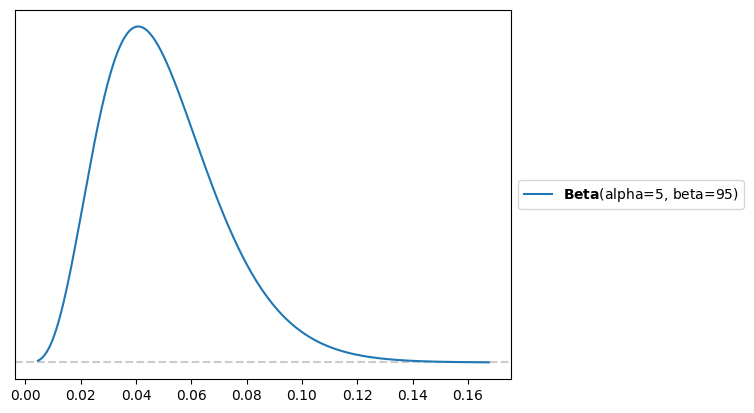

In [ ]:
pz.Beta(alpha=5, beta=95).plot_pdf()

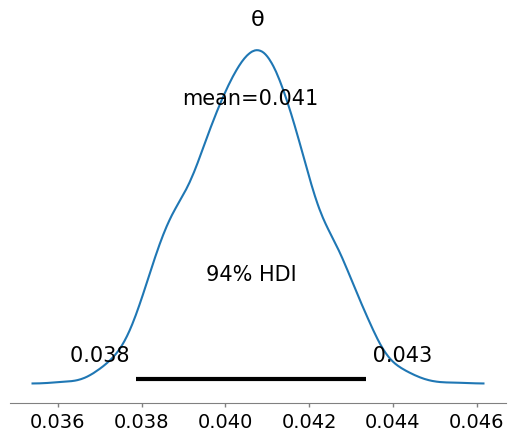

In [ ]:
import pymc as pm


#the makes we've seen from the NBA
VT_makes = np.repeat(1, 649)

#the misses we've seen from the NBA
VT_misses = np.repeat(0, 15372)

#combine makes and misses into one array
VT_data = np.concatenate( [VT_makes,VT_misses] )

#the last three lines can be combined into one line
#FT_data = np.repeat([1,0], repeats = [7,2])
#Which method of making FT_data is easier to understand?


#Nearly every single model we will build in this class will have
#the below outline as its foundation. Get hyped.

with pm.Model() as wmby_VT_model:
  #we define our prior with the makes and misses from Euroleague
  #notice how we make alpha and beta floats by using '.'
  θ = pm.Beta('θ' , alpha = 5. , beta = 95.)

  #we define our likelihood, which is how we process the free throws
  #we've seen Wemby make in the NBA
  #Think of Bernoulli as a stand in for the binomial distribution
  #It doesn't have inherent info about number of attempts, but number of attempts
  #is included in the data anyway.
  y = pm.Bernoulli('y', p = θ, observed = VT_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_VT = pm.sample(1000)
  #arviz is a companion data visualization library for pymc
  import arviz as az


  #vizualize the 1000 samples from the pymc model of the posterior
  az.plot_posterior(idata_VT)


Pymc Model: When I calculated the percentage of bills between 2021 and 2023 that got voted on I got 4.1% which is equivelent to mean on the graph (decently sure that means I did it correctly). The range is 3.8% which means in a situation similar to this the percentage of bills that would make it to voting is between that percentage. I also wasn't too off with my prediction that 5 out of every 100 bills get voted on (5%). This information honestly is a bit wild to me and shows how ineffiecent our legestalive system truly is. While I totally understand that it might take a while to pass laws or certain laws just shouldn't be passed I do think there is a pretty big likelihood that there are more than just 4.1% of bills that are good and useful bills. I think there needs to be atleast a big resturcturing on how these bills are passed to make it more efficent and in the end make our country a bit better everyday.